   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.3/189.3 kB 3.4 MB/s eta 0:00:00


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

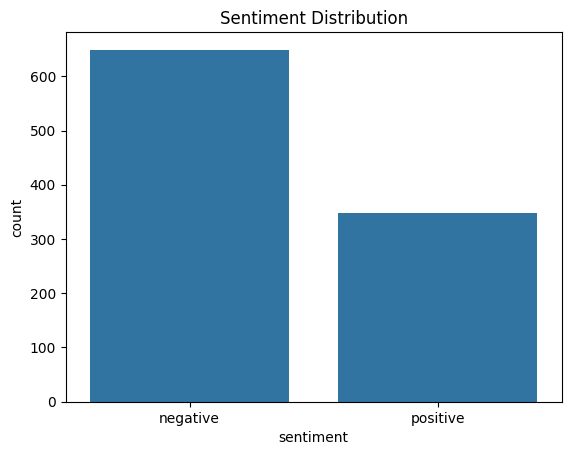

Sentiment Distribution Summary Statistics:
sentiment
negative    649
positive    348
Name: count, dtype: int64

Percentage Distribution:
sentiment
negative    65.095286
positive    34.904714
Name: count, dtype: float64


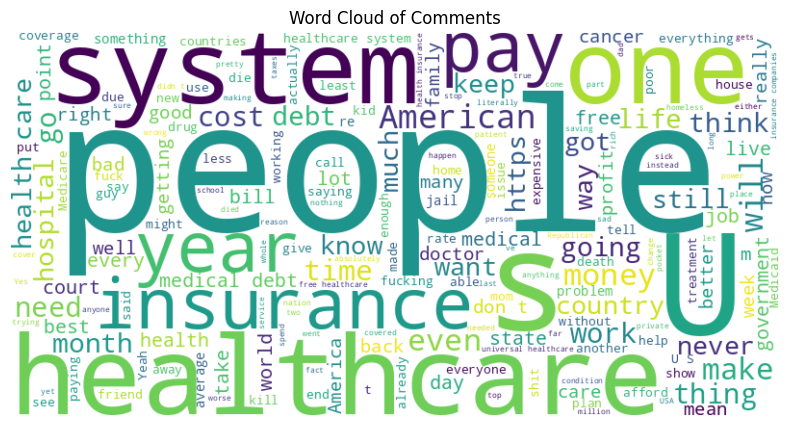

Word Cloud Summary Statistics:
Total number of comments: 997
Total words: 43192
Average words per comment: 43.32

Model Evaluation Metrics:
Accuracy: 0.95
Precision: 0.95
Recall: 0.92
F1 Score: 0.94

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       186
           1       0.95      0.92      0.94       114

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



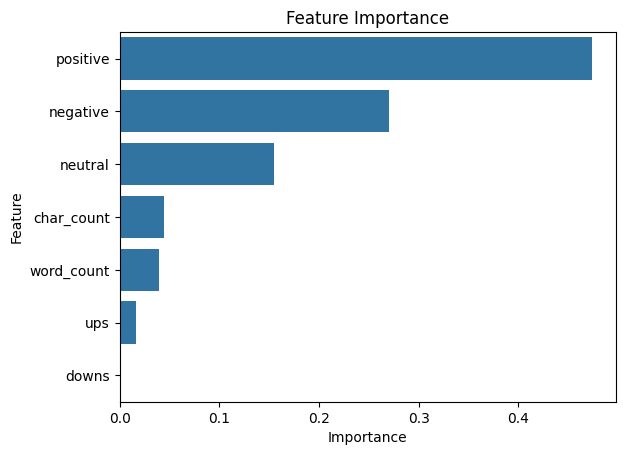


Feature Importance Summary Statistics:
      Feature  Importance
4    positive    0.473899
5    negative    0.269881
6     neutral    0.155221
2  char_count    0.044524
3  word_count    0.039892
0         ups    0.016583
1       downs    0.000000


In [ ]:
!pip install praw

# Import necessary libraries
import praw
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report



# Initialize PRAW with your Reddit application credentials
reddit = praw.Reddit(
    client_id='BmGfpxrgpA4U8yJZNl3Y2g',
    client_secret='hAzVgiZAFzsIeLAAfE_yga9VQtElyg',
    user_agent='My Reddit Data Scraper'
)

# Scrape data from the specified Reddit post
url = "https://www.reddit.com/r/MurderedByWords/comments/1g7ujh1/the_us_healthcare_will_kill_us_all/"
submission = reddit.submission(url=url)

# Extract comments
comments = []
submission.comments.replace_more(limit=None)
for comment in submission.comments.list():
    comments.append({
        "comment_id": comment.id,
        "text": comment.body,
        "created": comment.created_utc,
        "ups": comment.ups,
        "downs": comment.downs
    })

# Convert to DataFrame
df = pd.DataFrame(comments)

# Preprocessing the data
df['created'] = pd.to_datetime(df['created'], unit='s')  # Convert timestamp to datetime
df['char_count'] = df['text'].apply(len)  # Number of characters
df['word_count'] = df['text'].apply(lambda x: len(x.split()))  # Number of words

# Initialize VADER Sentiment Analyzer
import nltk
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

# Apply sentiment analysis
df['sentiment_scores'] = df['text'].apply(sid.polarity_scores)
df['positive'] = df['sentiment_scores'].apply(lambda x: x['pos'])
df['neutral'] = df['sentiment_scores'].apply(lambda x: x['neu'])
df['negative'] = df['sentiment_scores'].apply(lambda x: x['neg'])
df['compound'] = df['sentiment_scores'].apply(lambda x: x['compound'])
df['sentiment'] = df['compound'].apply(lambda x: 'positive' if x > 0 else 'negative')

# Exploratory Data Analysis
# Sentiment distribution
sns.countplot(x='sentiment', data=df)
plt.title('Sentiment Distribution')
plt.show()

# Sentiment distribution summary statistics
sentiment_counts = df['sentiment'].value_counts()
print("Sentiment Distribution Summary Statistics:")
print(sentiment_counts)
print("\nPercentage Distribution:")
print(sentiment_counts / len(df) * 100)

# Word cloud
text = ' '.join(comment for comment in df['text'])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Word Cloud of Comments')
plt.show()

# Word cloud summary statistics
print("Word Cloud Summary Statistics:")
print(f"Total number of comments: {len(df)}")
print(f"Total words: {df['word_count'].sum()}")
print(f"Average words per comment: {df['word_count'].mean():.2f}")

# Task 2: Predictive Analytics
# Prepare data for machine learning
features = df[['ups', 'downs', 'char_count', 'word_count', 'positive', 'negative', 'neutral']]
target = df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)  # Binary target

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nModel Evaluation Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': features.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()

# Feature importance summary statistics
print("\nFeature Importance Summary Statistics:")
print(feature_importance)

# Save the data for report
df.to_csv('reddit_comments_analysis.csv', index=False)
